In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('../data/train_test_data/train.csv')
data.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
0,Resort Hotel,156,2016,December,52,22,2,3,1,0.0,...,250.0,NaN,0,Transient-Party,57.22,0,3,Check-Out,2016-12-27,0
1,Resort Hotel,84,2015,September,38,14,4,10,2,0.0,...,241.0,NaN,0,Transient,103.51,1,0,Check-Out,2015-09-28,0
2,Resort Hotel,87,2015,July,30,25,2,4,2,0.0,...,240.0,NaN,0,Transient,134.00,0,3,Canceled,2015-06-02,1
3,City Hotel,190,2016,April,15,9,1,1,2,0.0,...,NaN,NaN,31,Transient-Party,70.00,0,0,Canceled,2015-12-09,1
4,Resort Hotel,8,2016,August,36,28,2,1,2,0.0,...,240.0,NaN,0,Transient,171.00,0,0,Canceled,2016-08-21,1


In [3]:
print("Rows :  ", data.shape[0])
print("Columns:  ", data.shape[1])
print()
print("Feature types:  ")
print(data.dtypes)
print()
print('Missing values : ')
print(data.isnull().sum())
print()
print('Missing value rate : ')
print(data.isnull().sum()/data.shape[0])
print()
print('Unique values:')
print(data.nunique())

Rows :   95512
Columns:   32

Feature types:  
hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                        

In [4]:
# create new feature: 'reserved=assigned'
def function(a, b):
    if a == b:
        return "Yes"
    else:
        return "No"
data['reserved=assigned'] = data.apply(lambda x : function(x['assigned_room_type'],x['reserved_room_type']),axis = 1)

In [5]:
# create new feature: 'day_of_week'
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], errors='coerce')
data['day_of_week'] = data['reservation_status_date'].dt.dayofweek
transform_num_day_of_week = {0: 'Monday',
                             1: 'Tuesday',
                             2: 'Wednesday',
                             3: 'Thursday',
                             4: 'Friday',
                             5: 'Saturday',
                             6: 'Sunday'}
data['day_of_week'] = data['day_of_week'].map(transform_num_day_of_week)

transform_day_weekday = {'Monday': 'Yes',
                         'Tuesday': 'Yes',
                         'Wednesday': 'Yes',
                         'Thursday': 'Yes',
                         'Friday': 'Yes',
                         'Saturday': 'No',
                         'Sunday': 'No'}
data['weekday?'] = data['day_of_week'].map(transform_day_weekday)

In [6]:
col_del=[]
to_num=[]
to_cat=[]

In [7]:
to_cat.append('adults')
to_cat.append('children')
to_cat.append('babies')
to_cat.append('is_repeated_guest')
to_cat.append('previous_cancellations')
to_cat.append('previous_bookings_not_canceled')
to_cat.append('booking_changes')
to_cat.append('days_in_waiting_list')
to_cat.append('total_of_special_requests')
to_cat.append('required_car_parking_spaces')
to_cat.append('is_canceled')
to_cat.append('stays_in_week_nights')
to_cat.append('stays_in_weekend_nights')

In [8]:
col_del.append('reservation_status_date')
col_del.append('reserved_room_type')
col_del.append('reservation_status')
col_del.append('day_of_week')
col_del.append('agent')
col_del.append('arrival_date_year')
col_del.append('arrival_date_week_number')
col_del.append('arrival_date_day_of_month')
data.drop(col_del,axis=1,inplace=True)

In [9]:
index1 = data.stays_in_week_nights>5
index2 = data.stays_in_weekend_nights>2

data.loc[index1,'stays_in_week_nights']=100000
data.loc[index2,'stays_in_weekend_nights']=100000

In [10]:
# drop features with too high missing rate
for col in data.columns:
    if data[col].isnull().sum()/data.shape[0] >= 0.8:
        data.drop(col,axis=1,inplace=True)

In [11]:
data.dtypes

hotel                              object
lead_time                           int64
arrival_date_month                 object
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
is_canceled                       

In [12]:
# to categorical
for col in to_cat:
    data[col] = data[col].astype(object)

In [13]:
data.dtypes

hotel                              object
lead_time                           int64
arrival_date_month                 object
stays_in_weekend_nights            object
stays_in_week_nights               object
adults                             object
children                           object
babies                             object
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations             object
previous_bookings_not_canceled     object
assigned_room_type                 object
booking_changes                    object
deposit_type                       object
days_in_waiting_list               object
customer_type                      object
adr                               float64
required_car_parking_spaces        object
total_of_special_requests          object
is_canceled                       

In [14]:
cat_cols=[]
num_cols=[]

# select_col_num_features
for col_name in data.columns:
    if data[col_name].dtypes == 'object':
        cat_cols.append(col_name)
    else:
        num_cols.append(col_name)

print("categorical features: ")
print(cat_cols)
print("numerical features: ")
print(num_cols)

categorical features: 
['hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'is_canceled', 'reserved=assigned', 'weekday?']
numerical features: 
['lead_time', 'adr']


In [15]:
# impute categorial features with low missing rate
for col in cat_cols:
    if data[col].isnull().sum()/data.shape[0] <= 0.2:
        freq = data[col].value_counts().idxmax()
        data[col].fillna(value=freq, inplace=True)

In [16]:
data.isnull().sum()

hotel                             0
lead_time                         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
is_canceled                       0
reserved=assigned                 0
weekday?                          0
dtype: int64

In [17]:
# mutil->bin for categorical features
to_cat.remove('stays_in_week_nights')
to_cat.remove('stays_in_weekend_nights')
for col in to_cat:
    data[col] = ['0' if x == 0 else '>0' for x in data[col]]

In [18]:
print("categorical features: ")
print(cat_cols)
print("numerical features: ")
print(num_cols)

categorical features: 
['hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'is_canceled', 'reserved=assigned', 'weekday?']
numerical features: 
['lead_time', 'adr']


In [19]:
data.nunique()

hotel                                2
lead_time                          476
arrival_date_month                  12
stays_in_weekend_nights              4
stays_in_week_nights                 7
adults                               2
children                             2
babies                               2
meal                                 5
country                            169
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations               2
previous_bookings_not_canceled       2
assigned_room_type                  12
booking_changes                      2
deposit_type                         3
days_in_waiting_list                 2
customer_type                        4
adr                               7975
required_car_parking_spaces          2
total_of_special_requests            2
is_canceled                          2
reserved=assigned                    2
weekday?                 

In [20]:
# merge rare categories to other
to_merge_rare = []
to_merge_rare.append('assigned_room_type')
to_merge_rare.append('country')
to_merge_rare.append('market_segment')


for col in to_merge_rare:
    print(col)
    series = pd.value_counts(data[col])
    mask = (series / series.sum() * 100).lt(5)  # 10 is the percentage
    data = data.assign(temp=np.where(data[col].isin(
        series[mask].index), 'Other', data[col]))
    data[col] = data.temp
    data.drop('temp', axis=1, inplace=True)
    print(data[col].value_counts())

assigned_room_type
A        59303
D        20275
Other     9681
E         6253
Name: assigned_room_type, dtype: int64
country
PRT      39253
Other    25619
GBR       9714
FRA       8329
ESP       6798
DEU       5799
Name: country, dtype: int64
market_segment
Online TA        45236
Offline TA/TO    19372
Groups           15830
Direct           10071
Other             5003
Name: market_segment, dtype: int64


In [21]:
data.nunique()

hotel                                2
lead_time                          476
arrival_date_month                  12
stays_in_weekend_nights              4
stays_in_week_nights                 7
adults                               2
children                             2
babies                               2
meal                                 5
country                              6
market_segment                       5
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations               2
previous_bookings_not_canceled       2
assigned_room_type                   4
booking_changes                      2
deposit_type                         3
days_in_waiting_list                 2
customer_type                        4
adr                               7975
required_car_parking_spaces          2
total_of_special_requests            2
is_canceled                          2
reserved=assigned                    2
weekday?                 

In [22]:
def find_outliers_tukey(feature):
    q1 = np.percentile(feature, 25)
    q3 = np.percentile(feature, 75)
    iqr = q3-q1
    upbound = q3+1.5*iqr
    downbound = q1 - 1.5*iqr
    outlier_indices = list(feature.index[(feature>upbound)|(feature<downbound)])
    outlier_values = list(feature[outlier_indices])
    return outlier_indices,outlier_values

In [23]:
# find outlier by 1.5IQR, then impute with median
for col in num_cols:
    outlier_indices,outlier_values = find_outliers_tukey(data[col])
    data.loc[outlier_indices,col]=data[col].median()

In [24]:
num_cols_skew=[]
for col in num_cols:
    print("Skewness for "+str(col)+": " +str(data[col].skew()))
    if data[col].skew()>1 or data[col].skew()<-1:
        data[col] = np.log1p(data[col])
        print("Skewness for "+str(col)+": " +str(data[col].skew()))

Skewness for lead_time: 1.0250030070533032
Skewness for lead_time: -0.9306433560515186
Skewness for adr: 0.3596447184525144


In [25]:
data.dtypes

hotel                              object
lead_time                         float64
arrival_date_month                 object
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                             object
children                           object
babies                             object
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations             object
previous_bookings_not_canceled     object
assigned_room_type                 object
booking_changes                    object
deposit_type                       object
days_in_waiting_list               object
customer_type                      object
adr                               float64
required_car_parking_spaces        object
total_of_special_requests          object
is_canceled                       

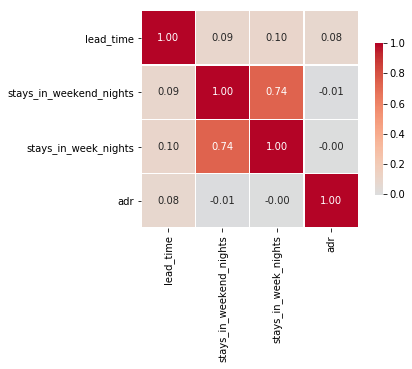

In [26]:
sns.heatmap(data.corr(method='pearson'), vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, cmap='coolwarm')
plt.show()

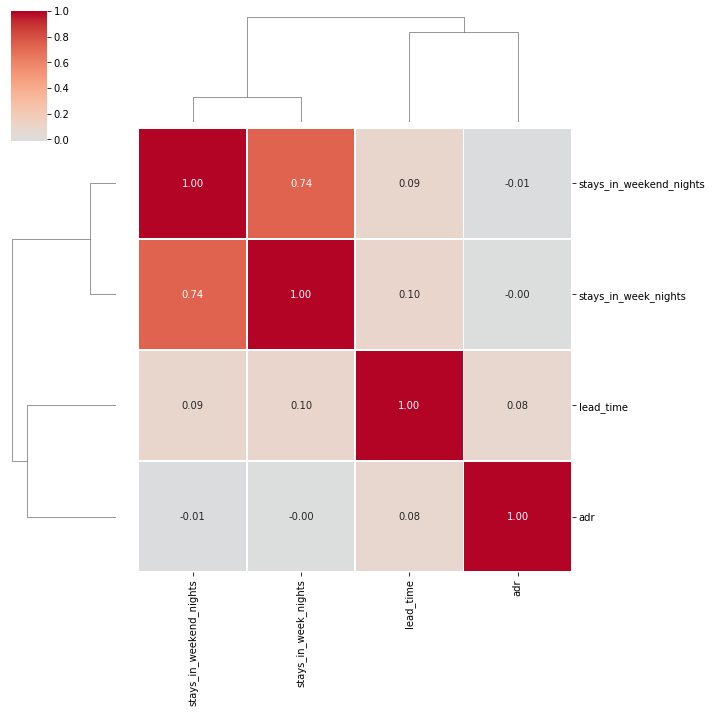

In [27]:
sns.clustermap(data.corr(method='pearson'), vmax=1.0, center=0, fmt='.2f',
               linewidths=.5, annot=True, cbar_kws={"shrink": .70}, cmap='coolwarm')
plt.show()

In [28]:
# find 2-class and multi-class features
bin_cols = data.nunique()[data.nunique()==2].keys().tolist()
multi_cols = [col for col in cat_cols if col not in bin_cols]

In [29]:
print("2-class features: ")
print(bin_cols)
print("multi-class features: ")
print(multi_cols)

2-class features: 
['hotel', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'is_canceled', 'reserved=assigned', 'weekday?']
multi-class features: 
['arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'meal', 'country', 'market_segment', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type']


In [30]:
# encode categorical features
le = LabelEncoder()
data_bin = data[bin_cols]
for col in bin_cols:
    data_bin[col] = le.fit_transform(data_bin[col])
    
data_multi = pd.get_dummies(data = data[multi_cols], columns=multi_cols)

# scaling numerical features
ss = StandardScaler()
data_num = ss.fit_transform(data[num_cols])
data_num = pd.DataFrame(data_num,columns=num_cols)

/Users/FY/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [31]:
new_data = pd.concat([data_bin,data_multi,data_num],axis=1)
new_data.head()

,hotel,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,...,assigned_room_type_Other,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,lead_time,adr
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.803407,-0.999882
1,1,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0.412524,0.162215
2,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.434620,0.927658
3,0,1,0,0,1,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0.928285,-0.679044
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,-1.017901,1.856532


In [32]:
new_data.shape

(95512, 71)

In [33]:
new_data.to_csv('../data/featured_data/featured_train.csv',index=False)

In [34]:
X = new_data.drop('is_canceled',axis=1)
y = new_data.is_canceled

In [35]:
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X)
joblib.dump(pca, '../models/pca.m') # save pca model as pca.m
joblib.dump(ss,'../models/scaler.m')  # save StandardScaler

['../models/scaler.m']

In [36]:
X_pca.shape

(95512, 48)

In [37]:
pd.DataFrame(X_pca).to_csv('../data/featured_data/X_train.csv',index=False)
pd.DataFrame(y).to_csv('../data/featured_data/y_train.csv',index=False)